# Binary Classification - Titanic Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [5]:
from sklearn.preprocessing import StandardScaler

## Importing Dataset

In [6]:
train_df = pd.read_csv('titanic_train.csv')

In [7]:
train_df.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

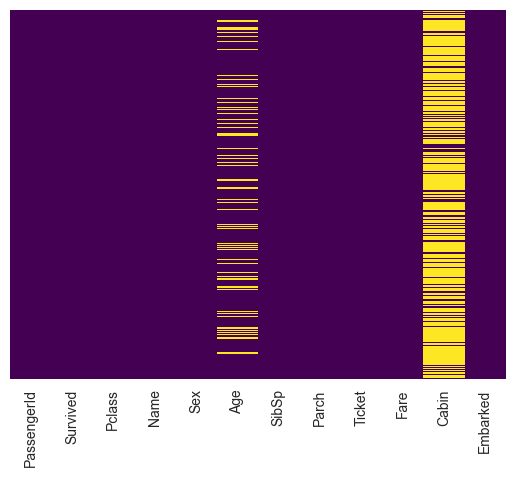

In [10]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

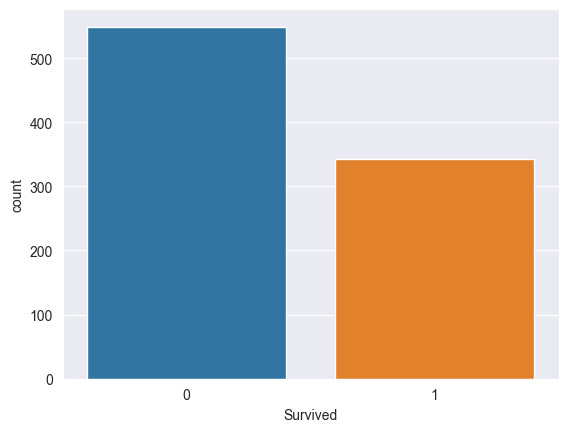

In [11]:
sns.countplot(data=train_df, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

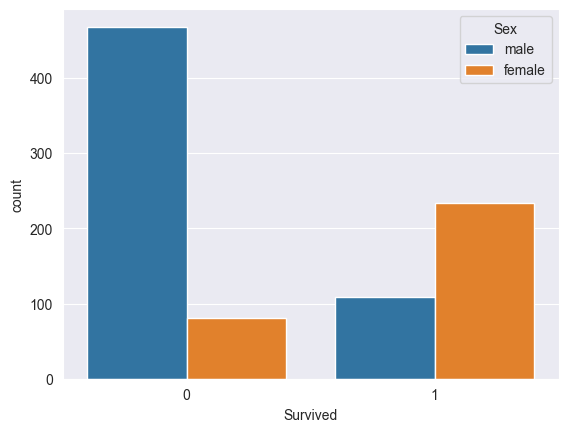

In [12]:
sns.countplot(data=train_df, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

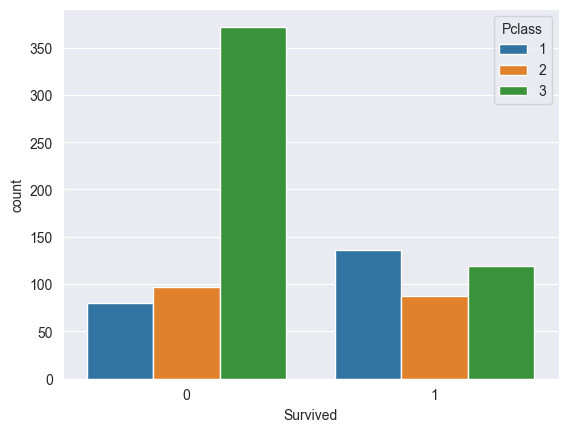

In [13]:
sns.countplot(data=train_df, x='Survived', hue='Pclass')

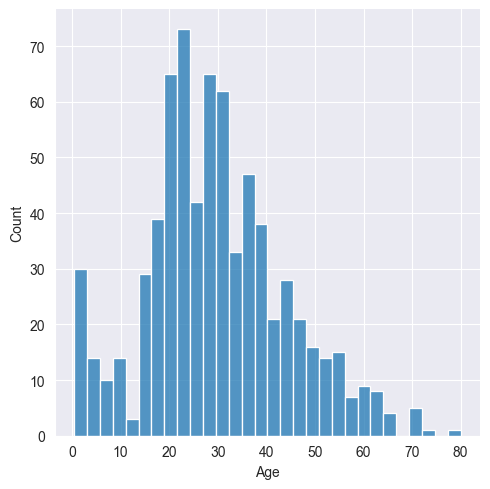

In [14]:
sns.displot(train_df['Age'].dropna(), kde=False, bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

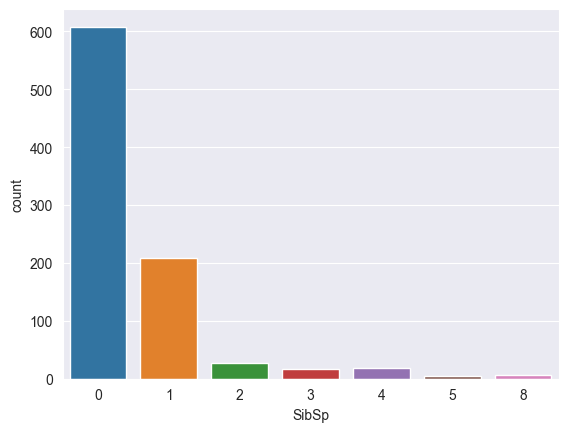

In [15]:
sns.countplot(data=train_df, x='SibSp')

<Axes: xlabel='Fare', ylabel='Count'>

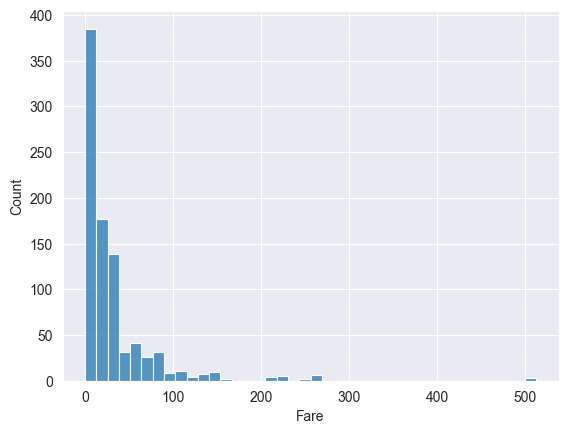

In [16]:
sns.histplot(data=train_df, x='Fare', bins=40)

## Dealing with Missing Data

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

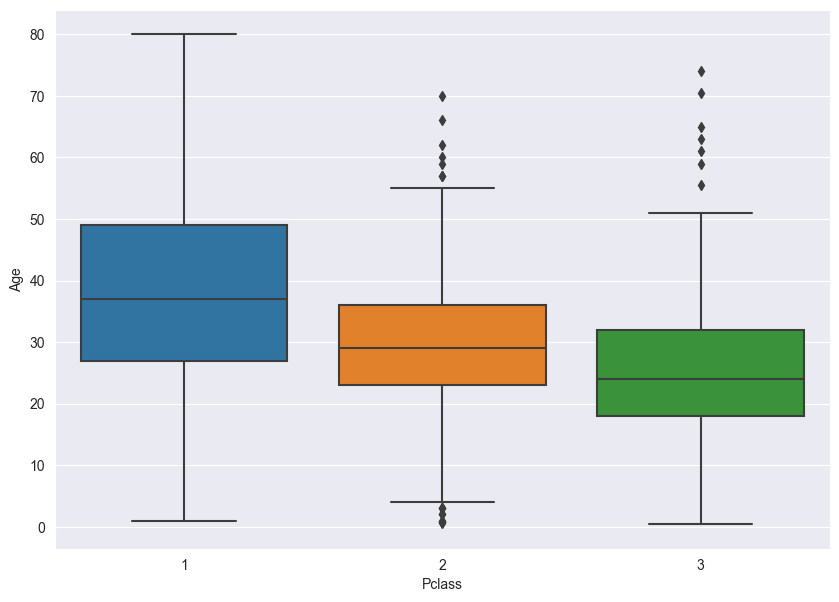

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train_df, x='Pclass', y='Age')

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

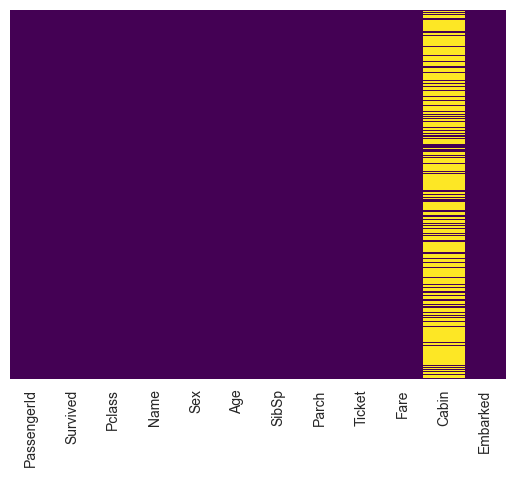

In [21]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train_df = train_df.drop('Cabin', axis=1)

In [23]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
train_df = train_df.dropna()

In [25]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

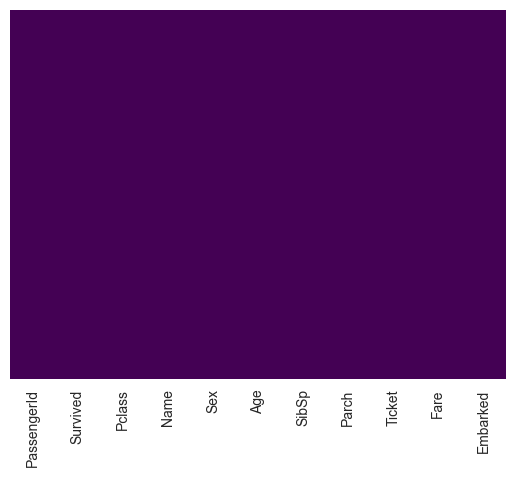

In [26]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Transforming Categorical Columns

In [27]:
train_df

PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  24.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[889 rows x 11 columns]

In [28]:
sex_df = pd.get_dummies(train_df['Sex'], drop_first=True)

In [29]:
embarked_df = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [30]:
train_df = pd.concat([train_df, sex_df, embarked_df], axis=1)

In [31]:
train_df.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   male      Q      S  
0      0         A/5 21171   7.2500        S   True  False   True  
1      0          PC 17599  71.2833        C  False  False  False  
2      0  STON/O2. 3101282   7.9250        S  False  False   True  
3      0            113803  53.1000        S  False  False   True  
4      0            373450   8.0500        S   True  False   True

### Dropping Extra Columns

In [32]:
train_df = train_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1)

In [33]:
train_df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare   male      Q   
0            1         0       3  22.0      1      0   7.2500   True  False  \
1            2         1       1  38.0      1      0  71.2833  False  False   
2            3         1       3  26.0      0      0   7.9250  False  False   
3            4         1       1  35.0      1      0  53.1000  False  False   
4            5         0       3  35.0      0      0   8.0500   True  False   

       S  
0   True  
1  False  
2   True  
3   True  
4   True

In [34]:
train_df = train_df.drop('PassengerId', axis=1)

In [35]:
train_df.head()

Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S
0         0       3  22.0      1      0   7.2500   True  False   True
1         1       1  38.0      1      0  71.2833  False  False  False
2         1       3  26.0      0      0   7.9250  False  False   True
3         1       1  35.0      1      0  53.1000  False  False   True
4         0       3  35.0      0      0   8.0500   True  False   True

## Separating X and Y variables

In [36]:
X = train_df.drop('Survived', axis=1)

In [37]:
y = train_df['Survived']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Training

In [39]:
model = LogisticRegression(max_iter=1000)

In [40]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Prediction and Evaluation

In [41]:
prediction = model.predict(X_test)

In [42]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [43]:
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
print(f"Recall Score: {recall_score(y_test, prediction)}")
print(f"F1 Score: {f1_score(y_test, prediction)}")

Accuracy Score: 0.8314606741573034
Precision Score: 0.8470588235294118
Recall Score: 0.6923076923076923
F1 Score: 0.761904761904762


## Recreating the Model

Model is retrained after performing preprocessing on X_train and X_test

### Preprocessing

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Creating Model

In [45]:
scaled_model = LogisticRegression()

In [46]:
scaled_model.fit(scaled_X_train, y_train)

LogisticRegression()

### Prediction and Evaluation

In [47]:
scaled_predictions = scaled_model.predict(scaled_X_test)

In [48]:
print(classification_report(y_test, scaled_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [49]:
print(f"Accuracy Score: {accuracy_score(y_test, scaled_predictions)}")
print(f"Precision Score: {precision_score(y_test, scaled_predictions)}")
print(f"Recall Score: {recall_score(y_test, scaled_predictions)}")
print(f"F1 Score: {f1_score(y_test, scaled_predictions)}")

Accuracy Score: 0.8277153558052435
Precision Score: 0.8452380952380952
Recall Score: 0.6826923076923077
F1 Score: 0.7553191489361704
